In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#폰트 설정
!apt-get update -qq
!apt-get install fonts-nanum -qq

import matplotlib.font_manager as fm
fm._load_fontmanager(try_read_cache=False)

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

print('Korean Font Setting Success')

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Korean Font Setting Success


In [2]:
url = '/content/drive/MyDrive/Colab Notebooks/AI·DX 교육/서울특별시 공공자전거 일별 대여건수_25.7-12.csv'
bike = pd.read_csv(url, encoding='cp949')
bike.head()

,대여일자,대여건수
0,2025-07-01,132914
1,2025-07-02,151653
2,2025-07-03,151092
3,2025-07-04,151367
4,2025-07-05,118354


In [3]:
bike.info()
bike.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   대여일자    184 non-null    object
 1   대여건수    184 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


,대여건수
count,184.000000
mean,106781.315217
std,38448.835581
min,10493.000000
25%,81656.250000
50%,110305.500000
75%,138113.750000
max,176011.000000


In [4]:
bike['대여일자']= pd.to_datetime(bike['대여일자'])
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   대여일자    184 non-null    datetime64[ns]
 1   대여건수    184 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.0 KB


<Axes: >

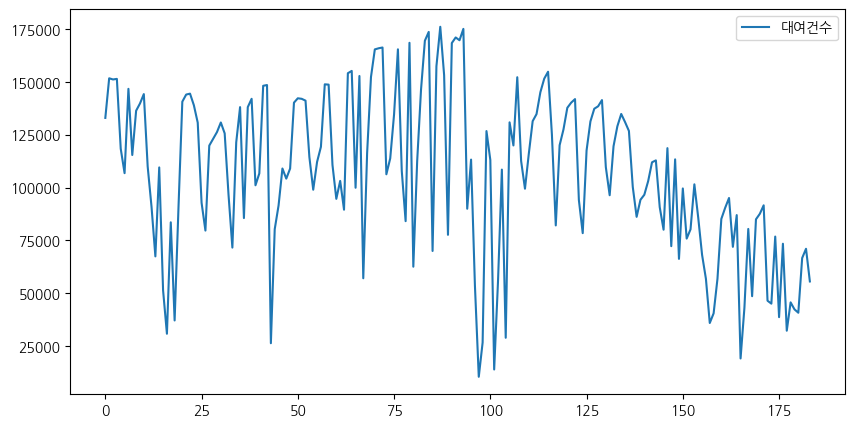

In [5]:
plt.figure(figsize=(10,5))
sns.lineplot(data=bike)

In [6]:
bike['월'] = bike['대여일자'].dt.month
bike.head()

,대여일자,대여건수,월
0,2025-07-01,132914,7
1,2025-07-02,151653,7
2,2025-07-03,151092,7
3,2025-07-04,151367,7
4,2025-07-05,118354,7


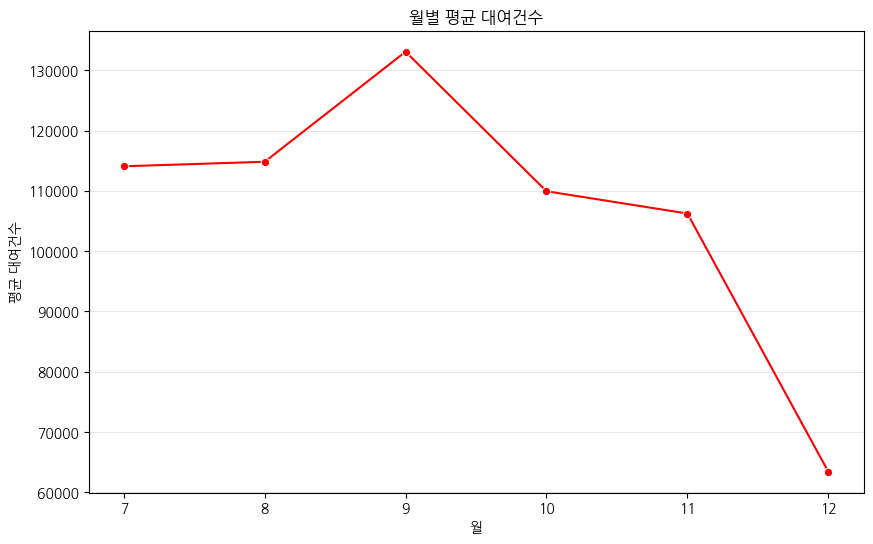

In [14]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_avg_rentals.index, y=monthly_avg_rentals.values, marker='o', color=r'r')
plt.title('월별 평균 대여건수')
plt.xlabel('월')
plt.ylabel('평균 대여건수')
plt.xticks(monthly_avg_rentals.index)
plt.grid(True, alpha=.3, axis='y')
plt.show()

9월에 갑자기 대여건수가 급등했다 -> 여름이 끝나고 시원한 가을에 나들이로 자전거를 많이 빌린것 같다  
12월에 급락했다 -> 겨울이 되어 추워서 손이 시렵기 때문에 빌리지 않은것 같다  

데이터를 분석한 결과, 자전거 대여건수는 늦은 여름에서 초가을까지 (7월~9월) 가장 높았으며, 특히 9월에 평균 133,077건으로 가장 많은 대여가 이루어졌습니다. 7월과 8월도 114,000건 정도로 높은 수준을 유지했고요.

하지만 10월부터 점차 감소하기 시작하여 11월에는 106,000건 수준으로 떨어졌습니다. 그리고 12월에는 평균 63,392건으로 급격히 감소하는 뚜렷한 하락세를 보였습니다.

이는 날씨가 따뜻하고 활동하기 좋은 시기에 자전거 이용이 활발하다가, 날씨가 추워지는 겨울철로 갈수록 이용이 크게 줄어드는 계절적 요인이 강하게 작용하고 있음을 보여줍니다.

In [15]:
bike['요일구분'] = bike['대여일자'].dt.dayofweek.apply(lambda x: '평일' if x < 5 else '주말')
bike.head()

,대여일자,대여건수,월,요일구분
0,2025-07-01,132914,7,평일
1,2025-07-02,151653,7,평일
2,2025-07-03,151092,7,평일
3,2025-07-04,151367,7,평일
4,2025-07-05,118354,7,주말


In [16]:
monthly_avg_rentals_weekday_weekend = bike.groupby(['월', '요일구분'])['대여건수'].mean()
print(monthly_avg_rentals_weekday_weekend)

월   요일구분
7   주말       90739.250000
    평일      122186.478261
8   주말      100024.100000
    평일      121858.190476
9   주말      113912.000000
    평일      140046.818182
10  주말       94191.375000
    평일      115403.478261
11  주말       89172.100000
    평일      114763.200000
12  주말       41791.000000
    평일       70906.347826
Name: 대여건수, dtype: float64


In [17]:
df_plot = monthly_avg_rentals_weekday_weekend.unstack()
df_plot = df_plot.reset_index()
print(df_plot.head())

요일구분   월          주말             평일
0      7   90739.250  122186.478261
1      8  100024.100  121858.190476
2      9  113912.000  140046.818182
3     10   94191.375  115403.478261
4     11   89172.100  114763.200000


In [18]:
df_plot_melted = df_plot.melt(id_vars=['월'], value_vars=['주말', '평일'], var_name='요일구분', value_name='대여건수')
print(df_plot_melted.head())

    월 요일구분        대여건수
0   7   주말   90739.250
1   8   주말  100024.100
2   9   주말  113912.000
3  10   주말   94191.375
4  11   주말   89172.100


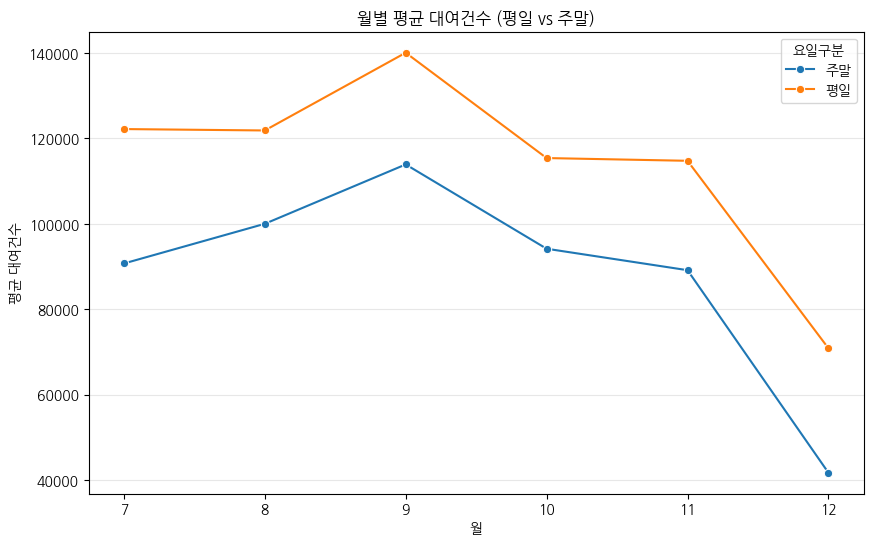

In [19]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_plot_melted, x='월', y='대여건수', hue='요일구분', marker='o')
plt.title('월별 평균 대여건수 (평일 vs 주말)')
plt.xlabel('월')
plt.ylabel('평균 대여건수')
plt.xticks(df_plot_melted['월'].unique())
plt.grid(True, alpha=0.3, axis='y')
plt.legend(title='요일구분')
plt.show()

주말이 전체적으로 평일보다 대여건수가 적다. 의외의 결과였다. 이 결과를 볼때 추정해 볼 수 있는 것은 따릉이를 나들이용보다는 출퇴근이나 평일에 활용을 많이 한다고 추정해 볼 수 있다.  

주말이 전체적으로 평일보다 대여건수가 적게 나타났습니다. 이는 예상과 다른 결과일 수 있습니다. 보통 주말에 나들이 용도로 자전거를 많이 이용할 것이라고 생각하기 쉽지만, 이 데이터에서는 평일 대여건수가 더 높았습니다.

이러한 결과로 미루어 볼 때, 서울시 공공자전거 '따릉이'는 나들이나 레저 활동보다는 출퇴근이나 평상시 이동 수단으로 활용되는 비중이 더 높은 것으로 추정해 볼 수 있습니다. 하지만, 서울시의 반년동안의 데이터로는 신뢰가 매우 높은 유의미한 데이터 양이라고 볼 수 없어, 추측이나 예상을 할 수 있지 무조건 상관관계가 있다는 것은 아닙니다.

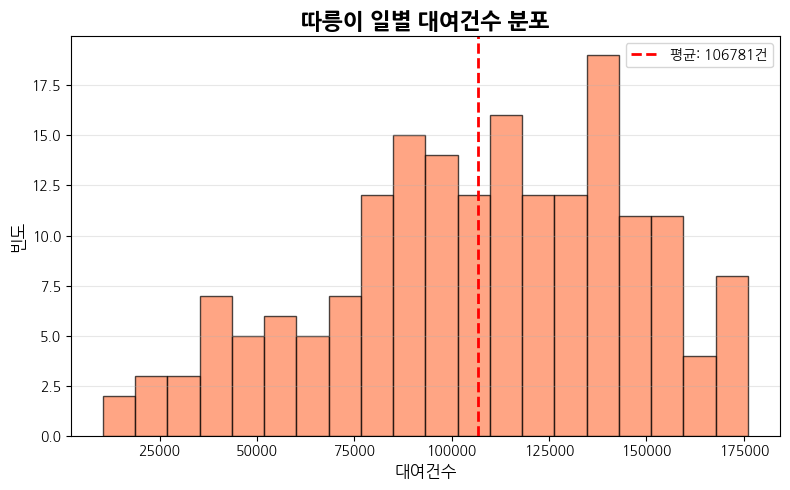

In [31]:
plt.figure(figsize=(8,5))
plt.hist(bike['대여건수'], bins=20, edgecolor='k', alpha=.7, color='coral')
plt.title("따릉이 일별 대여건수 분포", fontsize=16, fontweight='bold')
plt.xlabel("대여건수", fontsize=12)
plt.ylabel("빈도", fontsize=12)

plt.axvline(bike['대여건수'].mean(), color='r', linestyle='dashed', linewidth=2, label=f'평균: {bike["대여건수"].mean():.0f}건')
plt.legend()
plt.tight_layout()
plt.grid(True, alpha=.3, axis='y')
plt.show()

분포는 오른쪽으로 치우쳐진 형태를 보이며, 대부분의 날에 대여건수가 특정 범위에 집중되어 있습니다.  

히스토그램의 최빈값은 약 8만~10만 건 사이에 위치하며, 평균 대여건수는 이보다 약간 높은 약 10만 6천 건입니다.  

이는 대부분의 날에는 중간 정도의 대여건수를 기록하지만, 간혹 매우 높은 대여건수를 기록하는 날들이 존재함을 의미합니다.  

넓은 범위의 대여건수 분포는 일별 대여량의 변동성이 큼을 보여줍니다.

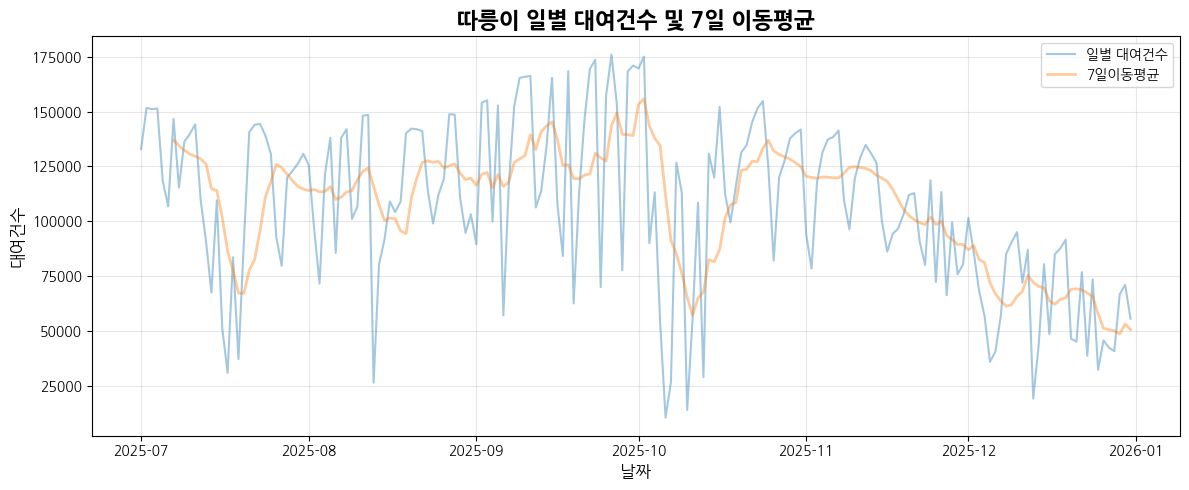

In [33]:
bike['7일_이동평균'] = bike['대여건수'].rolling(window=7).mean()
plt.figure(figsize=(12, 5))
plt.plot(bike['대여일자'], bike['대여건수'], alpha=.4, label='일별 대여건수')
plt.plot(bike['대여일자'], bike['7일_이동평균'], alpha=.4, linewidth=2, label='7일이동평균')

plt.title("따릉이 일별 대여건수 및 7일 이동평균", fontsize=16, fontweight='bold')
plt.xlabel('날짜', fontsize=12)
plt.ylabel('대여건수', fontsize=12)
plt.legend()
plt.grid(alpha=.3)
plt.tight_layout()
plt.show()

In [35]:
bike.head(50)

,대여일자,대여건수,월,요일구분,7일_이동평균
0,2025-07-01,132914,7,평일,NaN
1,2025-07-02,151653,7,평일,NaN
2,2025-07-03,151092,7,평일,NaN
3,2025-07-04,151367,7,평일,NaN
4,2025-07-05,118354,7,주말,NaN
5,2025-07-06,106785,7,주말,NaN
6,2025-07-07,146664,7,평일,136975.571429
7,2025-07-08,115371,7,평일,134469.428571
8,2025-07-09,136307,7,평일,132277.142857
9,2025-07-10,139733,7,평일,130654.428571


요일
Friday       110453.269231
Monday       110038.346154
Saturday      89338.346154
Sunday        88239.769231
Thursday     120000.769231
Tuesday      115758.666667
Wednesday    113053.518519
Name: 대여건수, dtype: float64


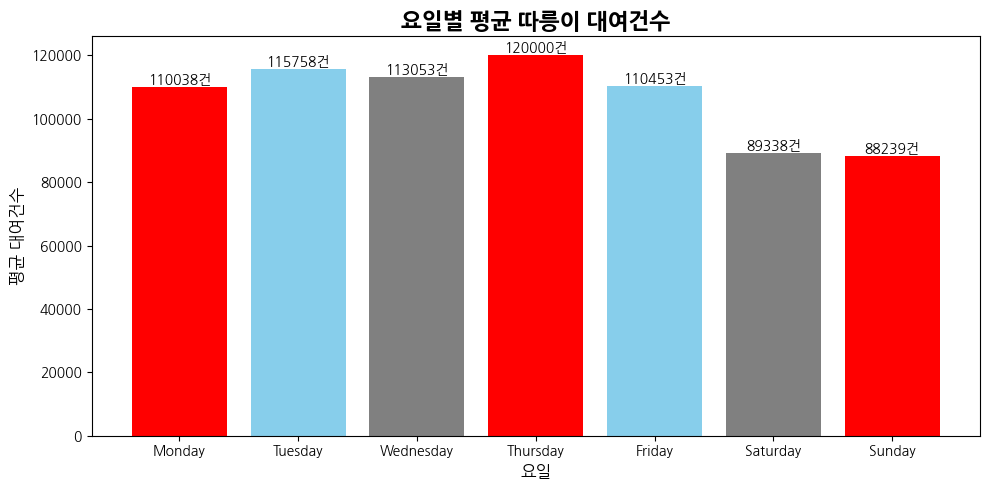

In [50]:
bike['요일'] = bike['대여일자'].dt.day_name()

weekday_mean = bike.groupby("요일")['대여건수'].mean()
# print(weekday_mean)
order = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']
weekday_mean = weekday_mean.reindex(order)

plt.figure(figsize=(10,5))
bars = plt.bar(weekday_mean.index, weekday_mean.values, color=['r','skyblue','grey'])

plt.title("요일별 평균 따릉이 대여건수", fontsize=16, fontweight='bold')
plt.xlabel("요일", fontsize=12)
plt.ylabel("평균 대여건수", fontsize=12)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}건', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

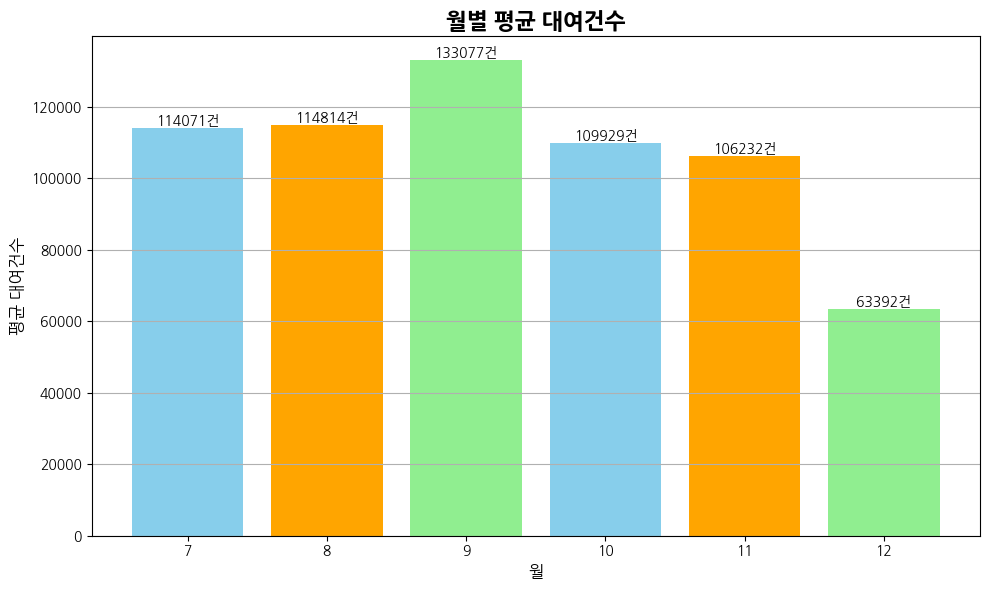

In [65]:
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_avg_rentals.index, monthly_avg_rentals.values, color=['skyblue','orange','lightgreen'])
plt.title('월별 평균 대여건수', fontsize=16, fontweight='bold')
plt.xlabel('월',fontsize=12)
plt.ylabel('평균 대여건수', fontsize=12)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}건', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.grid(axis='y')
plt.show()

9월에 갑자기 대여건수가 급등했다 -> 여름이 끝나고 시원한 가을에 나들이로 자전거를 많이 빌린것 같다  
12월에 급락했다 -> 겨울이 되어 추워서 손이 시렵기 때문에 빌리지 않은것 같다  

데이터를 분석한 결과, 자전거 대여건수는 늦은 여름에서 초가을까지 (7월~9월) 가장 높았으며, 특히 9월에 평균 133,077건으로 가장 많은 대여가 이루어졌습니다. 7월과 8월도 114,000건 정도로 높은 수준을 유지했고요.

하지만 10월부터 점차 감소하기 시작하여 11월에는 106,000건 수준으로 떨어졌습니다. 그리고 12월에는 평균 63,392건으로 급격히 감소하는 뚜렷한 하락세를 보였습니다.

이는 날씨가 따뜻하고 활동하기 좋은 시기에 자전거 이용이 활발하다가, 날씨가 추워지는 겨울철로 갈수록 이용이 크게 줄어드는 계절적 요인이 강하게 작용하고 있음을 보여줍니다.

In [66]:
sns.set_theme(style='whitegrid', font="NanumGothic")

In [78]:
url= '/content/drive/MyDrive/Colab Notebooks/AI·DX 교육/한국전력거래소_지역별 시간별 태양광 및 풍력 발전량_20241231.csv'
pikachuu = pd.read_csv(url, encoding='cp949')
pikachuu.head()

,거래일자,거래시간,지역,연료원,전력거래량(MWh)
0,2024-01-01,1,강원도,태양광,0.0
1,2024-01-01,2,강원도,태양광,0.0
2,2024-01-01,3,강원도,태양광,0.0
3,2024-01-01,4,강원도,태양광,0.0
4,2024-01-01,5,강원도,태양광,0.0


In [85]:
pikachuu.columns.tolist()

['거래일자', '거래시간', '지역', '연료원', '전력거래량(MWh)']

In [86]:
pikachuu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166896 entries, 0 to 166895
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   거래일자        166896 non-null  object 
 1   거래시간        166896 non-null  int64  
 2   지역          166896 non-null  object 
 3   연료원         166896 non-null  object 
 4   전력거래량(MWh)  166896 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 6.4+ MB


In [89]:
unique_regions_count = pikachuu['지역'].nunique()
print(f"'지역' 컬럼의 고유 데이터 종류 수: {unique_regions_count}개")

'지역' 컬럼의 고유 데이터 종류 수: 19개


In [90]:
unique_regions = pikachuu['지역'].unique()
print("불러온 데이터에 있는 모든 고유 지역:")
for region in unique_regions:
    print(region)

불러온 데이터에 있는 모든 고유 지역:
강원도
경기도
경상남도
경상북도
광주시
대구시
대전시
부산시
서울시
세종시
울산시
인천시
전라남도
전라북도
제주도
충청남도
충청북도
육지
제주


In [91]:
# 'timestamp' 컬럼을 Unix 타임스탬프에서 datetime 객체로 변환
data['timestamp_datetime'] = pd.to_datetime(data['timestamp'], unit='s')

# 변환된 데이터 확인
print(data[['timestamp', 'timestamp_datetime', 'rating']].head())

   timestamp  timestamp_datetime  rating
0  964982703 2000-07-30 18:45:03     4.0
1  964981247 2000-07-30 18:20:47     4.0
2  964982224 2000-07-30 18:37:04     4.0
3  964983815 2000-07-30 19:03:35     5.0
4  964982931 2000-07-30 18:48:51     5.0


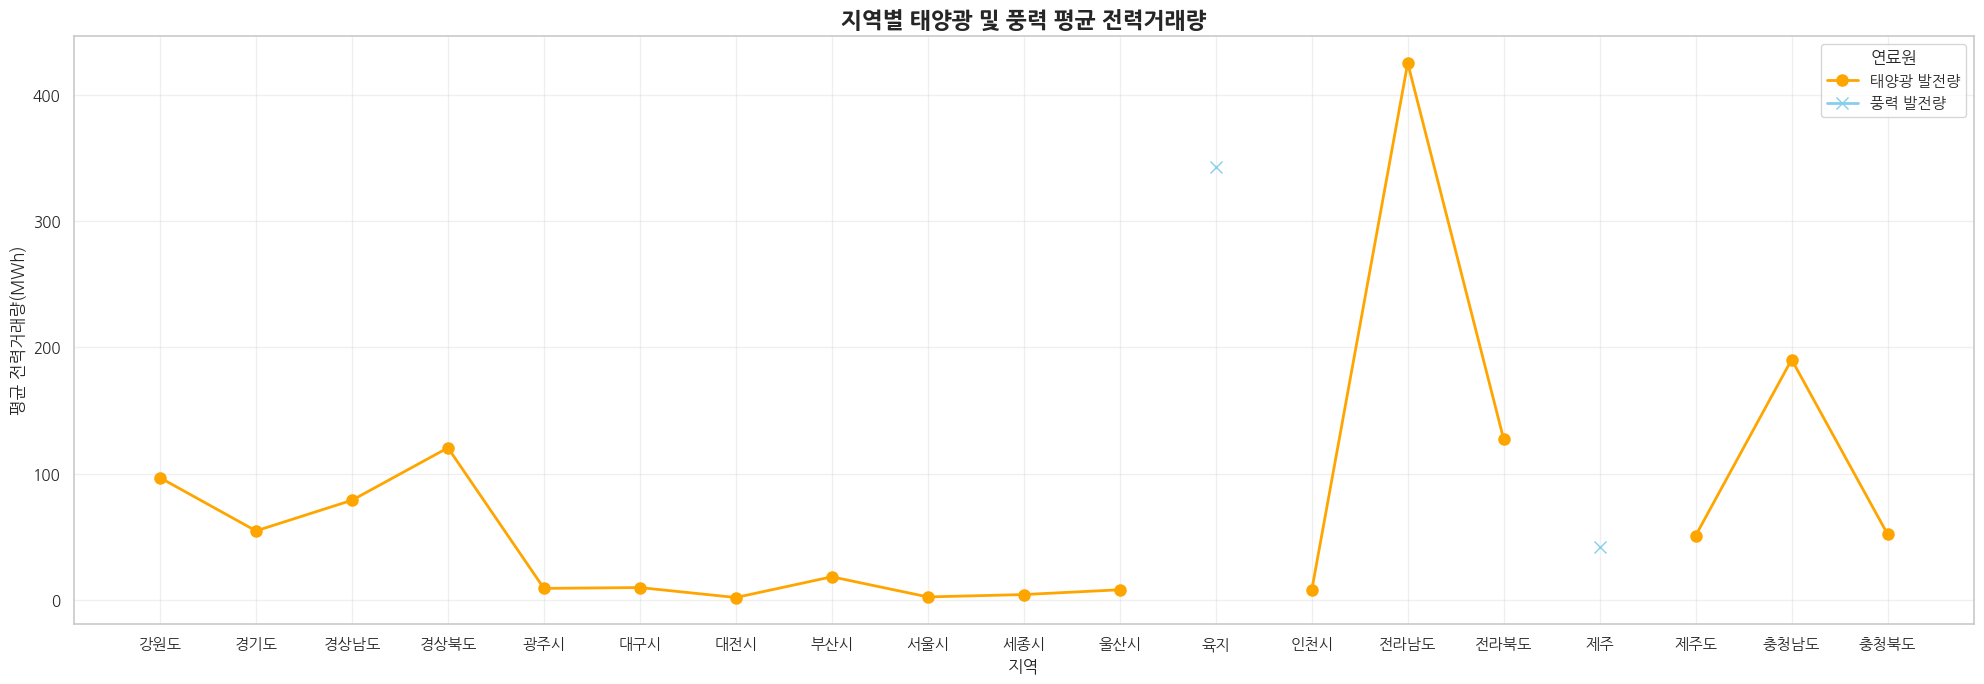

In [111]:
plt.figure(figsize=(20, 7))

# 지역과 연료원별 평균 전력거래량 계산
avg_power_by_region_source = pikachuu.groupby(['지역', '연료원'])['전력거래량(MWh)'].mean().unstack()

# 태양광 발전량 플롯
plt.plot(avg_power_by_region_source.index, avg_power_by_region_source['태양광'], marker='o', linewidth=2, markersize=8, label='태양광 발전량', color='orange')
# 풍력 발전량 플롯
plt.plot(avg_power_by_region_source.index, avg_power_by_region_source['풍력'], marker='x', linewidth=2, markersize=8, label='풍력 발전량', color='skyblue')

plt.title('지역별 태양광 및 풍력 평균 전력거래량', fontsize=16, fontweight='bold')
plt.xlabel('지역', fontsize=12)
plt.ylabel('평균 전력거래량(MWh)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title='연료원')
plt.tight_layout()
plt.show()

### 지역별 태양광 및 풍력 평균 전력거래량 (그룹 막대 그래프)

이전의 선 그래프는 여러 지역의 데이터가 겹쳐 가시성이 떨어지는 문제가 있었습니다. 각 지역별 태양광 및 풍력 발전량을 명확하게 비교할 수 있도록 그룹 막대 그래프로 다시 시각화하겠습니다. `avg_power_by_region_source` 데이터프레임을 `melt`하여 Seaborn의 `barplot`에 적합한 형태로 만든 후 그립니다.

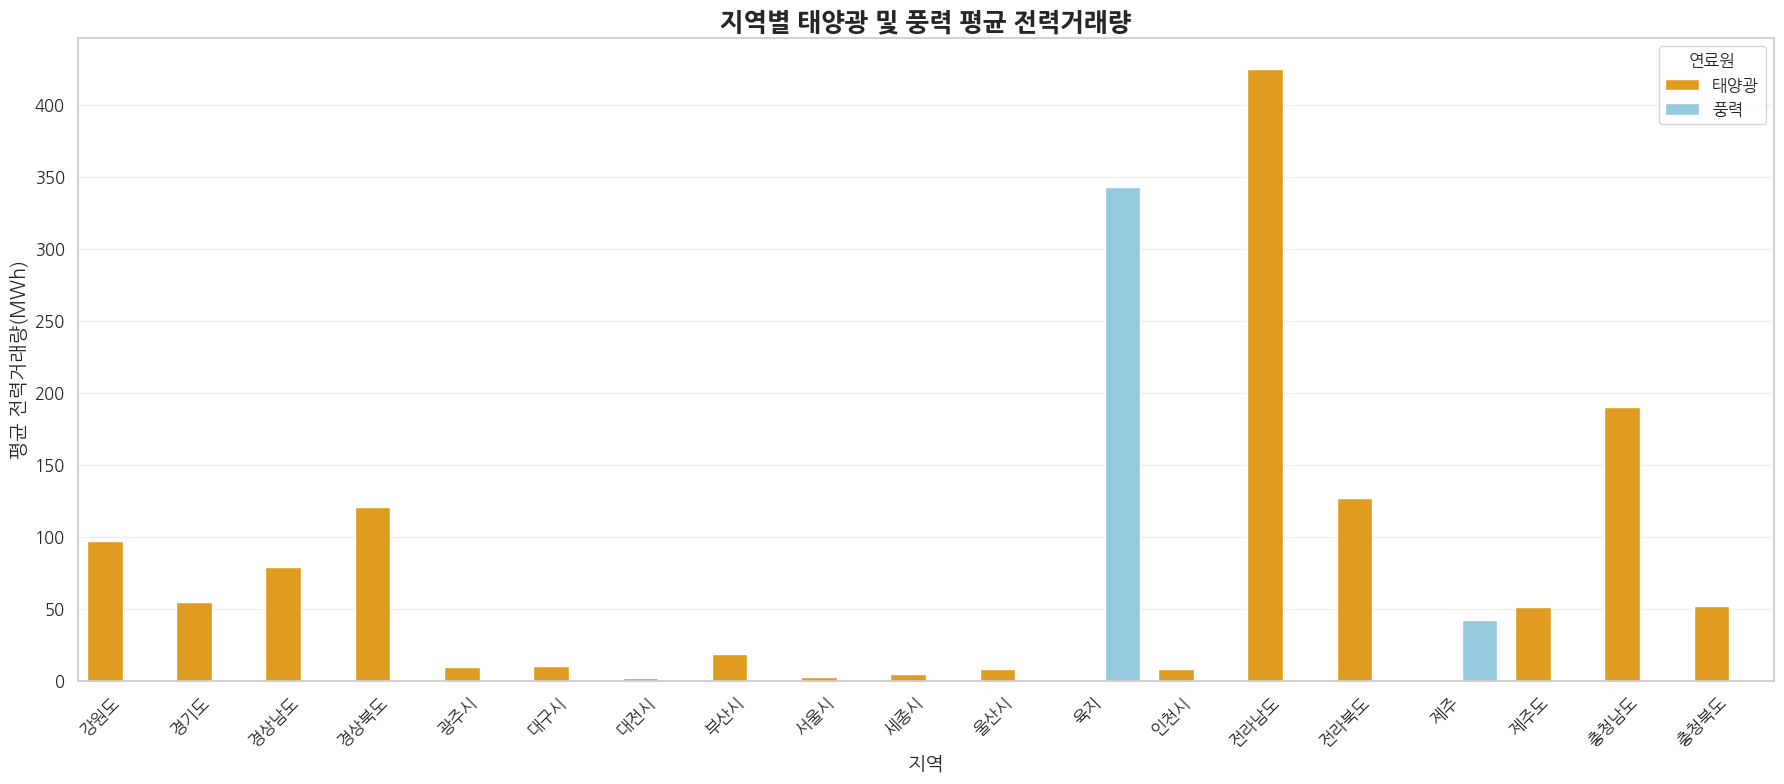

In [113]:
# avg_power_by_region_source DataFrame을 melt하여 barplot에 적합한 형태로 변환
# 인덱스(지역)를 컬럼으로 만들고, 연료원(태양광, 풍력)을 하나의 컬럼으로 모읍니다.
plot_data_melted = avg_power_by_region_source.reset_index().melt(id_vars='지역', var_name='연료원', value_name='평균 전력거래량(MWh)')

plt.figure(figsize=(18, 8))
sns.barplot(data=plot_data_melted, x='지역', y='평균 전력거래량(MWh)', hue='연료원', palette={'태양광': 'orange', '풍력': 'skyblue'})

plt.title('지역별 태양광 및 풍력 평균 전력거래량', fontsize=18, fontweight='bold')
plt.xlabel('지역', fontsize=14)
plt.ylabel('평균 전력거래량(MWh)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12) # x축 레이블 회전 및 크기 조정
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.legend(title='연료원', fontsize=12, title_fontsize=12)
plt.tight_layout()
plt.show()

### 그룹 막대 그래프 분석 결과

그룹 막대 그래프를 통해 지역별 태양광과 풍력 발전량을 훨씬 명확하게 비교할 수 있습니다.

*   **태양광 발전 특징**: 주황색 막대(`태양광`)를 보면, **전라남도**에서 압도적으로 높은 평균 전력거래량을 보여줍니다. 그 외 전라북도, 경상북도, 충청남도 등에서도 상당한 태양광 발전량을 보입니다. 대부분의 내륙 지역에서 태양광 발전이 이루어지고 있음을 알 수 있습니다.

*   **풍력 발전 특징**: 하늘색 막대(`풍력`)는 '육지'와 '제주'에서만 유의미하게 높게 나타납니다. 특히 **육지**의 풍력 발전량이 매우 높으며, **제주** 또한 풍력 발전의 주요 거점임을 명확히 보여줍니다. 다른 지역에서는 풍력 발전량이 매우 낮거나 거의 없어, 풍력 발전 시설의 지역적 집중 현상이 뚜렷합니다.

*   **지역별 차이점**:
    *   **전라남도**는 태양광 발전이 매우 활발하지만 풍력은 미미합니다.
    *   **육지**는 태양광 발전량은 없지만 풍력 발전량이 압도적으로 높습니다.
    *   **제주**는 태양광과 풍력 발전이 모두 이루어지며, 특히 풍력의 비중이 높습니다.

이 그래프는 각 지역의 재생에너지 발전 구성과 규모를 직관적으로 이해하는 데 큰 도움을 줍니다. 지리적, 기상적 조건에 따라 최적의 발전원이 다르게 나타남을 시각적으로 확인할 수 있습니다.

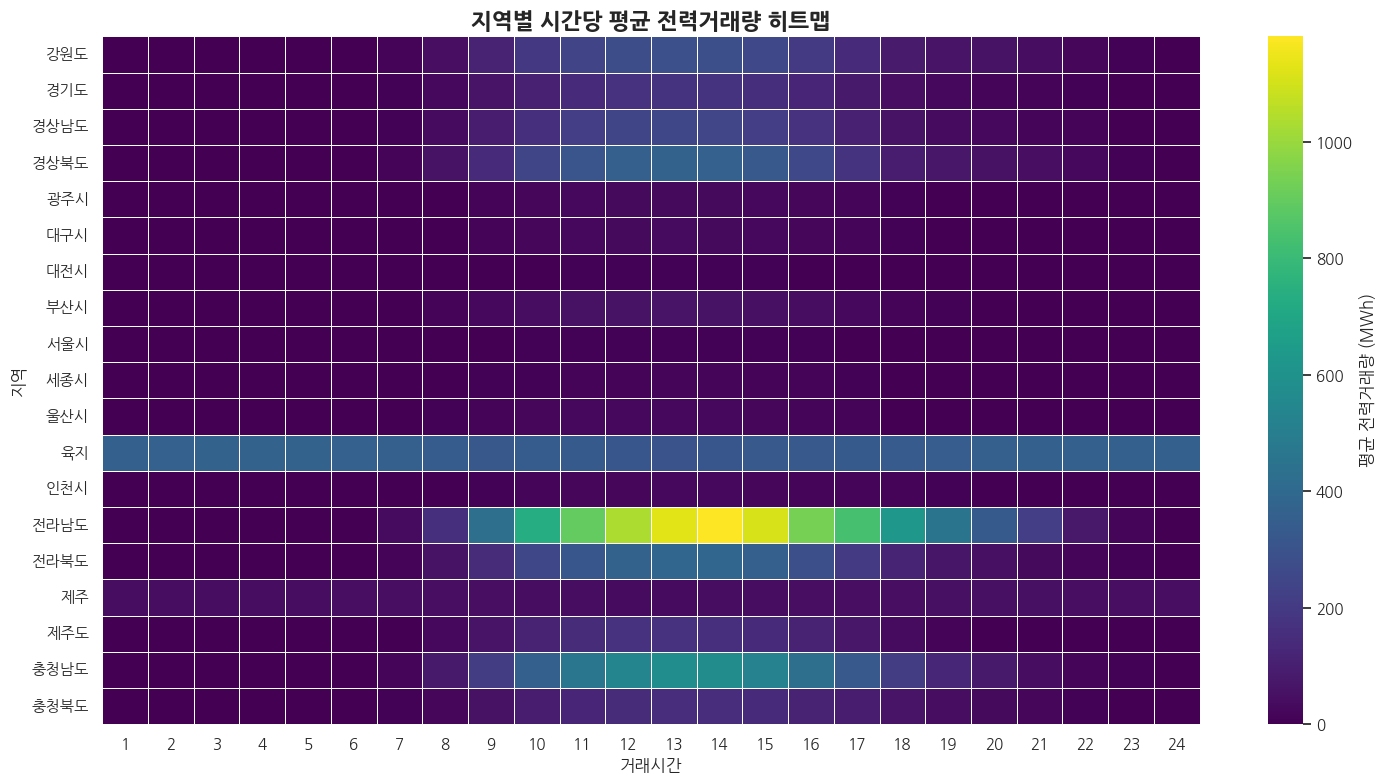

In [96]:
# 히트맵 데이터 준비: 지역별, 시간별 평균 전력거래량 계산
heatmap_data = pikachuu.groupby(['지역', '거래시간'])['전력거래량(MWh)'].mean().unstack()

# 히트맵 그리기
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, cmap='viridis', fmt=".1f", linewidths=.5, cbar_kws={'label': '평균 전력거래량 (MWh)'})
plt.title('지역별 시간당 평균 전력거래량 히트맵', fontsize=16, fontweight='bold')
plt.xlabel('거래시간', fontsize=12)
plt.ylabel('지역', fontsize=12)
plt.tight_layout()
plt.show()

### 거래시간별 전력거래량 상관관계 히트맵

`heatmap_data`는 '지역'을 행으로, '거래시간'을 열로 하는 평균 전력거래량 데이터입니다. 여기에 `.corr()` 메서드를 적용하면 각 '거래시간' 컬럼들 간의 상관계수를 계산하여 상관관계 행렬을 얻을 수 있습니다. 이 행렬을 히트맵으로 시각화하여 특정 거래시간의 전력거래량이 다른 거래시간의 전력거래량과 얼마나 강한 선형 관계를 가지는지 파악할 수 있습니다.

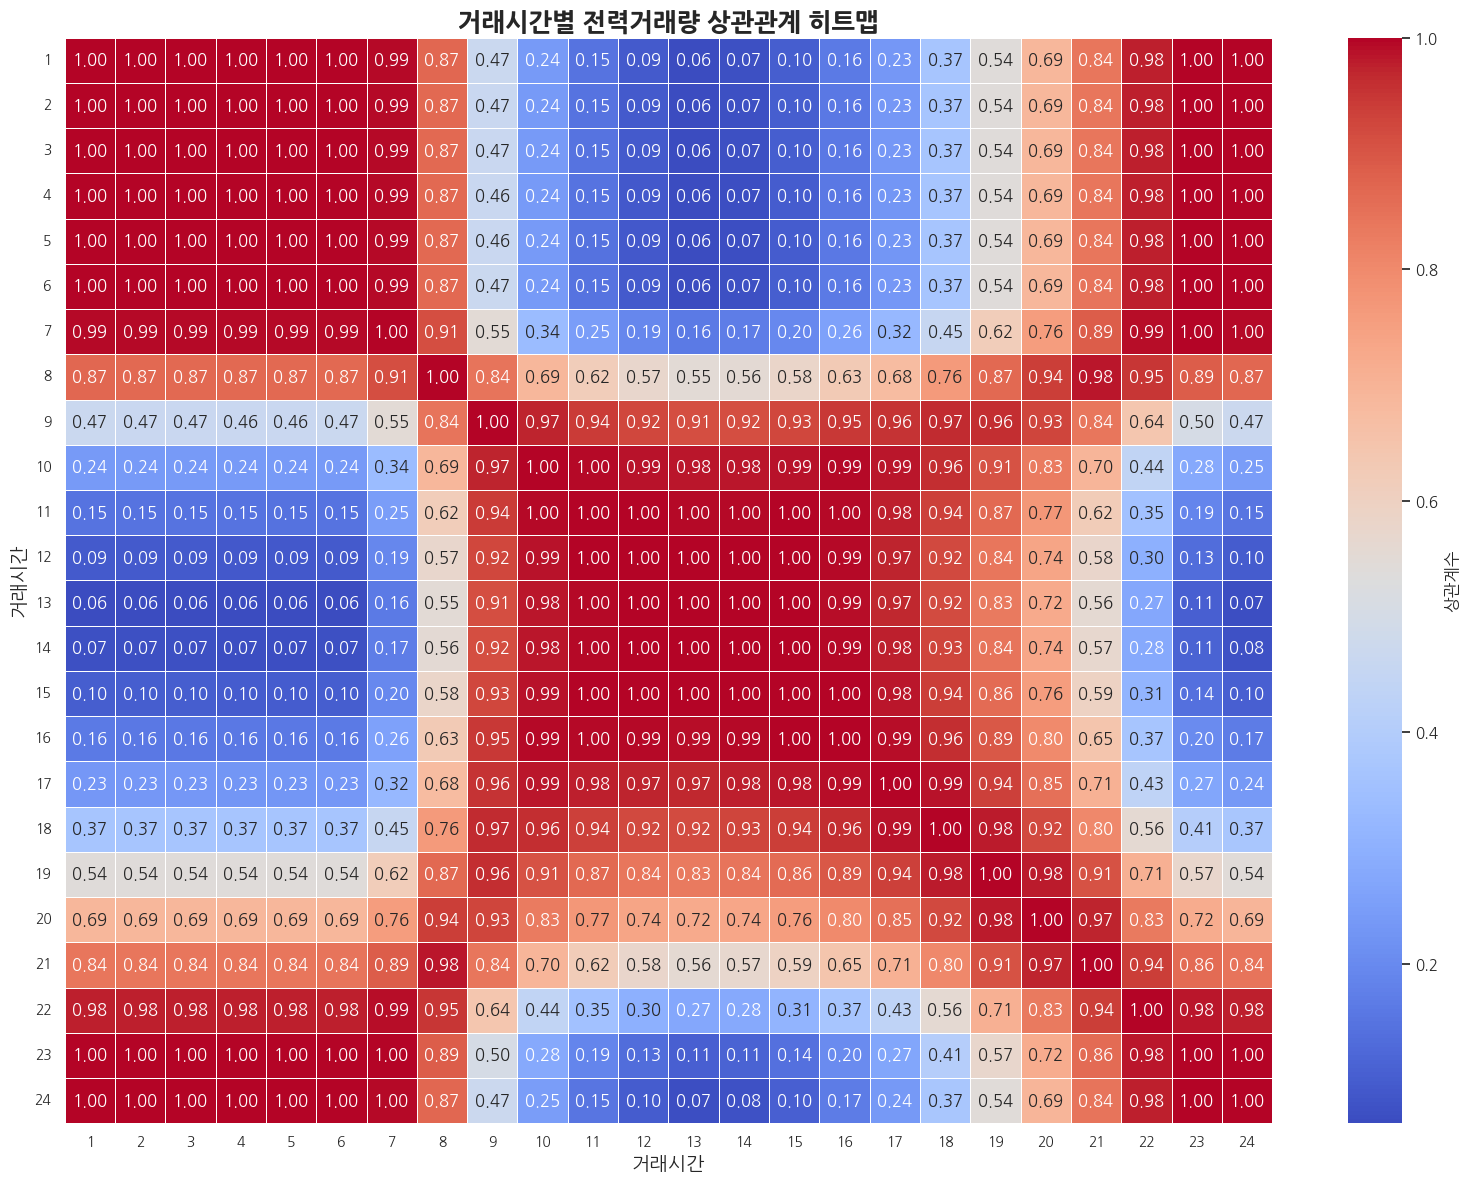

In [131]:

correlation_matrix = heatmap_data.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': '상관계수'})
plt.title('거래시간별 전력거래량 상관관계 히트맵', fontsize=18, fontweight='bold')
plt.xlabel('거래시간', fontsize=14)
plt.ylabel('거래시간', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()
plt.show()

### 거래시간대별 평균 전력거래량 (선 그래프)

각 거래시간별 평균 전력거래량을 선 그래프로 시각화하여 하루 동안의 전력 생산량 변화 패턴을 명확하게 파악해 보겠습니다. 이는 전력 수요 및 공급 계획 수립에 중요한 통찰력을 제공할 수 있습니다.

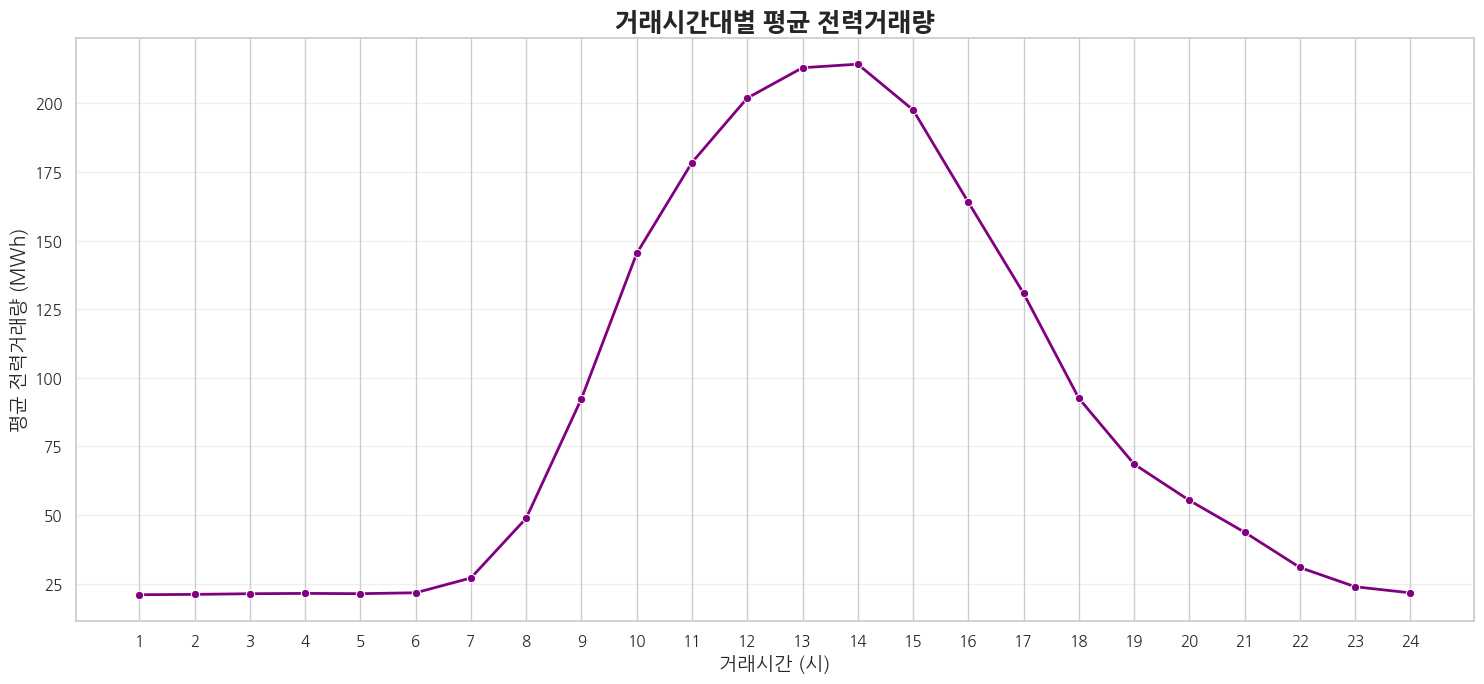

In [133]:
# 거래시간대별 평균 전력거래량 계산
hourly_avg_power = pikachuu.groupby('거래시간')['전력거래량(MWh)'].mean()

plt.figure(figsize=(15, 7))
sns.lineplot(x=hourly_avg_power.index, y=hourly_avg_power.values, marker='o', color='purple', linewidth=2)

plt.title('거래시간대별 평균 전력거래량', fontsize=18, fontweight='bold')
plt.xlabel('거래시간 (시)', fontsize=14)
plt.ylabel('평균 전력거래량 (MWh)', fontsize=14)
plt.xticks(range(1, 25)) # 1시부터 24시까지 모든 시간을 표시
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

### 거래시간대별 평균 전력거래량 선 그래프 분석 결과

이 선 그래프는 하루 24시간 동안 평균 전력거래량이 어떻게 변하는지를 명확하게 보여줍니다.

*   **심야 및 새벽 시간 (01시 ~ 06시)**: 전력거래량이 매우 낮은 수준을 유지하며 거의 0에 가깝습니다. 이 시간대에는 태양광 발전이 이루어지지 않으므로, 풍력 발전 등의 다른 발전원에서 생산되는 전력량이 상대적으로 적거나, 전체 전력 수요가 낮기 때문으로 해석됩니다.

*   **오전 시간 (07시 ~ 10시)**: 해가 뜨면서 태양광 발전이 시작되고 점차 활성화되면서 전력거래량이 급격히 증가하기 시작합니다.

*   **낮 시간 피크 (11시 ~ 16시)**: 전력거래량이 하루 중 가장 높은 수준을 기록합니다. 특히 정오 무렵(12시~14시)에 피크를 찍는 경향을 보입니다. 이는 태양광 발전의 일조량이 가장 풍부한 시간대이기 때문입니다.

*   **오후 및 저녁 시간 (17시 ~ 20시)**: 해가 지면서 태양광 발전량이 감소함에 따라 전력거래량도 서서히 줄어드는 모습을 보입니다.

*   **밤 시간 (21시 ~ 24시)**: 전력거래량이 다시 낮은 수준으로 돌아가며 안정화됩니다.

**종합적으로**: 그래프는 태양광 발전의 영향을 강하게 반영하여 주간에 전력거래량이 급증하고, 야간에는 급감하는 뚜렷한 일일 패턴을 보여줍니다. 이러한 패턴은 전력 시스템 운영에서 발전원별 특성을 고려한 효율적인 전력 계획 수립의 중요성을 시사합니다.

### 거래시간별 전력거래량 상관관계 히트맵 분석 결과

이 히트맵은 각 '거래시간'의 전력거래량이 다른 '거래시간'의 전력거래량과 얼마나 강한 양의 상관관계(붉은색), 음의 상관관계(푸른색), 또는 낮은 상관관계(회색)를 가지는지 보여줍니다. 상관계수는 -1부터 1까지의 값을 가지며, 1에 가까울수록 강한 양의 선형 관계, -1에 가까울수록 강한 음의 선형 관계를 의미합니다.

*   **강한 양의 상관관계 (대각선 및 주변)**: 히트맵의 대각선은 항상 1입니다. 이는 특정 시간의 전력거래량이 자기 자신과 100% 상관관계가 있다는 의미입니다. 대각선 주변의 셀들도 짙은 붉은색을 띠는 것을 볼 수 있는데, 이는 인접한 시간대의 전력거래량 패턴이 매우 유사하다는 것을 의미합니다. 예를 들어, 오전 9시의 전력거래량은 오전 10시와 매우 강한 양의 상관관계를 가집니다.

*   **낮 시간대의 높은 상관관계**: 일반적으로 오전 8~9시부터 오후 5~6시까지의 낮 시간대 전력거래량은 서로 강한 양의 상관관계를 가집니다. 이는 태양광 발전의 영향으로 해가 떠 있는 시간에 전력 생산량이 유사한 패턴을 보이기 때문입니다.

*   **낮 시간대와 밤 시간대의 상관관계**: 낮 시간대(특히 태양광 발전이 활발한 시간)의 전력거래량은 밤 시간대(새벽 또는 늦은 저녁)의 전력거래량과 상대적으로 낮은 상관관계나 약한 음의 상관관계를 가질 수 있습니다. 밤에는 태양광 발전이 없으므로, 전력 생산 패턴이 크게 달라지기 때문입니다.

*   **특정 시간대의 독립성**: 일부 시간대, 특히 자정 직후나 이른 새벽 시간대의 전력거래량은 다른 시간대와의 상관관계가 낮게 나타날 수 있습니다. 이는 전력 수요 및 공급 패턴이 특정 시간에 더 독자적으로 움직인다는 것을 나타냅니다.

이 히트맵은 전력 시스템 운영에서 수요 예측 및 발전 계획 수립 시, 시간대별 전력거래량 패턴의 상호 의존성을 이해하는 데 중요한 통찰력을 제공합니다.

In [68]:
!wget https://files.grouplens.org/datasets/movielens/ml-latest-small.zip

--2026-02-03 07:34:14--  https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.96.204
Connecting to files.grouplens.org (files.grouplens.org)|128.101.96.204|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip’

ml-latest-small.zip 100%[===================>] 955.28K  3.31MB/s    in 0.3s    

2026-02-03 07:34:14 (3.31 MB/s) - ‘ml-latest-small.zip’ saved [978202/978202]



In [74]:
!unzip ml-latest-small.zip

Archive:  ml-latest-small.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


In [77]:
ratings = pd.read_csv("ml-latest-small/ratings.csv")
movies = pd.read_csv("ml-latest-small/movies.csv")

data = ratings.merge(movies, on="movieId")
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [83]:
data.columns.tolist()

['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres']

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


/tmp/ipython-input-3931721670.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_rating.index, y=genre_rating.values, palette='viridis', legend=False)


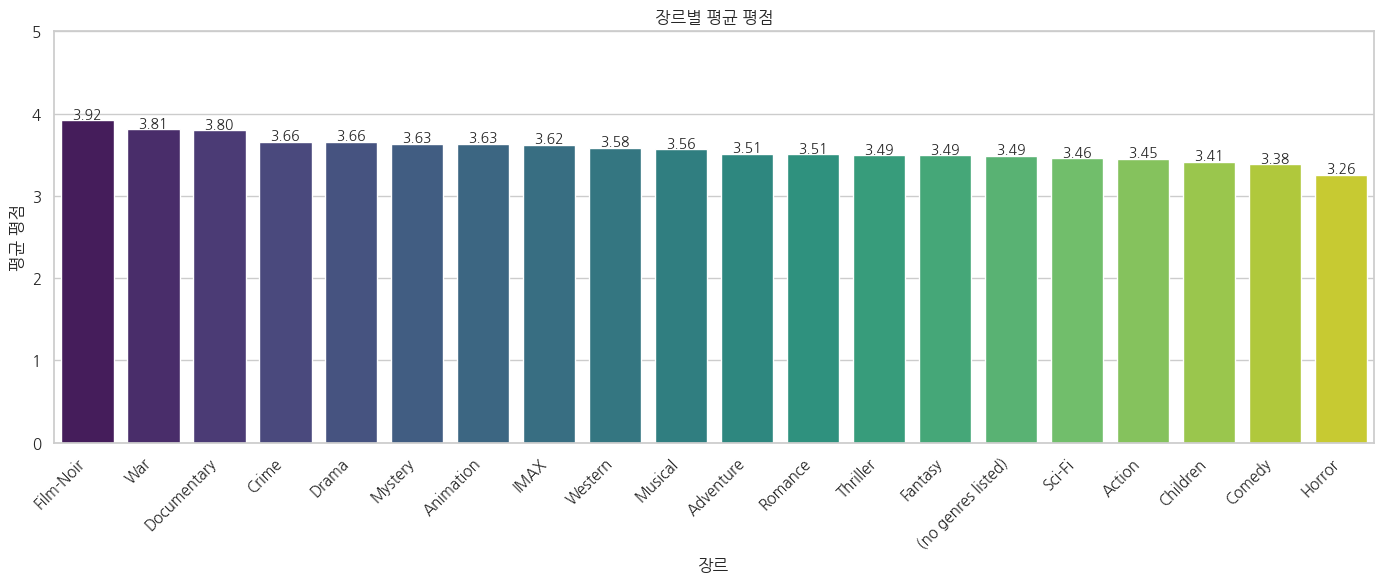

In [109]:
genre_rating = (
    data.assign(genres=data['genres'].str.split('|'))
    .explode('genres')
    .groupby("genres")['rating']
    .mean()
    .sort_values(ascending=False)
)
plt.figure(figsize=(14,6))

sns.barplot(x=genre_rating.index, y=genre_rating.values, palette='viridis', legend=False)
for i, v in enumerate(genre_rating.values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha="center", fontsize=10)
plt.title("장르별 평균 평점")
plt.xlabel("장르")
plt.ylabel("평균 평점")
plt.xticks(rotation=45, ha='right')
plt.ylim(0,5)
plt.tight_layout()
plt.show()

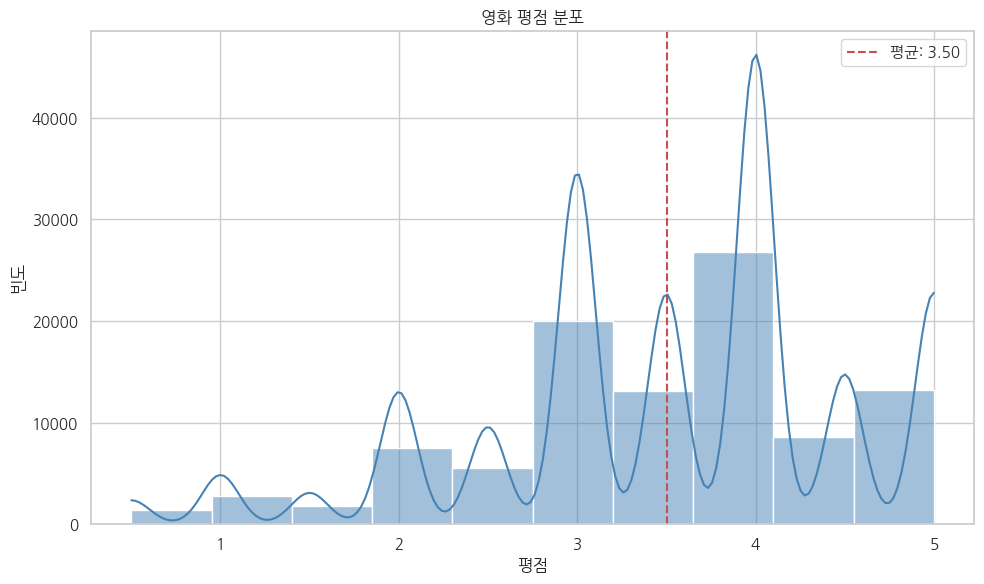

In [116]:
plt.figure(figsize=(10,6))
sns.histplot(data['rating'], bins=10, kde=True, color="steelblue")
plt.axvline(ratings['rating'].mean(), color='r', linestyle='--', label=f'평균: {ratings['rating'].mean():.2f}')
plt.xlabel('평점')
plt.ylabel('빈도')
plt.title('영화 평점 분포')

plt.legend()
plt.tight_layout()
plt.show()

In [120]:
data['main_genre'] = data['genres'].str.split("|").str[0]
major_genres = ["Action","Comedy","Drama","Romance","Thriller"]
genre_filtered = data[data['main_genre'].isin(major_genres)]

/tmp/ipython-input-3686732626.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = genre_filtered, x='main_genre', y='rating', palette='Set2')


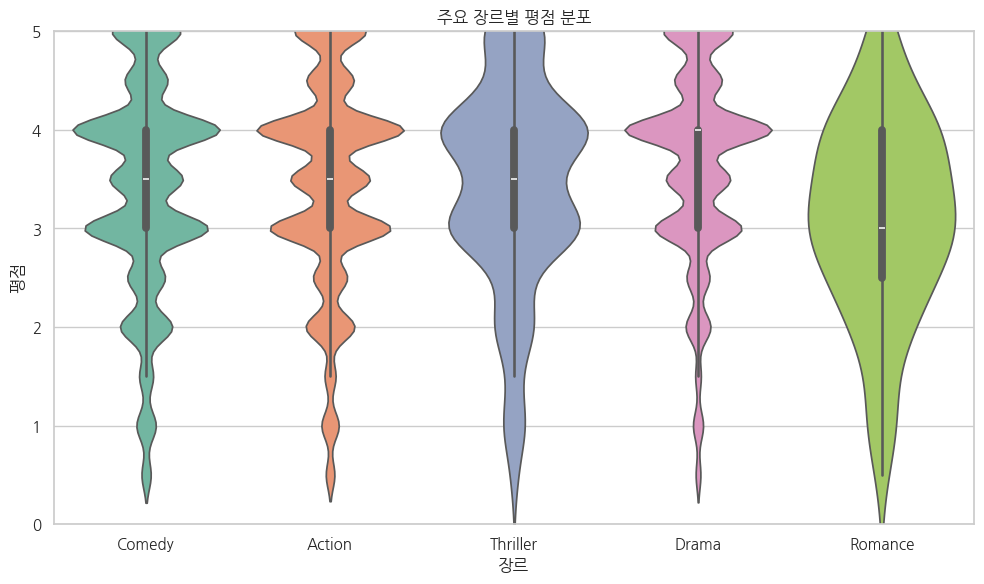

In [134]:
plt.figure(figsize=(10,6))
sns.violinplot(data = genre_filtered, x='main_genre', y='rating', palette='Set2')
plt.xlabel('장르')
plt.ylabel('평점')
plt.title("주요 장르별 평점 분포")
plt.ylim(0,5)
plt.tight_layout()
plt.show()